<a href="https://colab.research.google.com/github/Idighekere/laptop-price-prediction-ml-model/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Prediction

- **Dataset:** [Laptop Price Dataset on Kaggle](https://www.kaggle.com/datasets/muhammetvarl/laptop-price)
- **Group:** Group **D**
- **Task**: Developong a robust linear regression model that can predict the price of a laptop given its various attributes
- **Random State:** 5
- **Test Size:** 25%

## Importing dependencies and Initializations


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initializing constants to be used in model building
RANDOM_STATE=5
TEST_SIZE=25/100 # i.e 25 %

## Loading datasets



In [ ]:
df=pd.read_csv("dataset/laptop_price.csv",encoding='latin-1')

# display first 10 rows
df.head(10)
# Display the number of rows and columns
df.shape

## Data Cleaning and Preprocessing:

1. Identify and handle missing values appropriately.

In [ ]:

# Identifying Missing Vlues
df.isnull().sum()
# The result shows that there are no missing values

2. Address outliers in numerical features.

In [ ]:

## remove gb and kg from Ram and weight and convert the cols to numeric
df['Ram'] = df['Ram'].str.replace("GB", "")
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')


# Identifying nmerial columns
numerical_columns = df.select_dtypes(include=np.number).columns

# finding outliers

for col in numerical_columns:

    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers

    # Addressing outliers by removing them
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


3. Convert categorical features into numerical representations suitable for machine learning algorithms. Clearly document your chosen encoding strategies.

In [ ]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original dataframe
df_encoded = df.copy()

# Determine categorical features
categorical_columns = df.select_dtypes(include="object").columns
print("Categorical columns:", list(categorical_columns))

"""
One-Hot Encoding Strategy:
Columns: Company, TypeName, OpSys
Reason: Low number of unique values, nominal (no natural order), important for model
"""
one_hot_columns = ["Company", "TypeName", "OpSys"]

# Apply one-hot encoding
for col in one_hot_columns:
    # Create dummy variables
    dummies = pd.get_dummies(df_encoded[col], prefix=col, dtype=int)
    # Concatenate with the main dataframe
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    # Drop the original column
    df_encoded.drop(col, axis=1, inplace=True)

"""
Label Encoding Strategy:
Columns: Product, ScreenResolution, Cpu, Memory, Gpu
Reason: High number of unique values - one-hot encoding would create too many columns
"""
label_encoded_columns = ["Product", "ScreenResolution", "Cpu", "Memory", "Gpu"]

for col in label_encoded_columns:
    le = LabelEncoder()  # Create new encoder for each column
    df_encoded[col + "_encoded"] = le.fit_transform(df_encoded[col])
    # Drop the original column
    df_encoded.drop(col, axis=1, inplace=True)

print(f"Original shape: {df.shape}")
print(f"Encoded shape: {df_encoded.shape}")


Categorical columns: ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']
Original shape: (1008, 13)
Encoded shape: (1008, 43)


## Exploratory Data Analysis (EDA)

1. Conduct a comprehensive EDA to understand the distribution of features and their relationships with the price.

In [ ]:
# Setting up the plot style
plt.style.use('seaborn-v0_8-whitegrid')

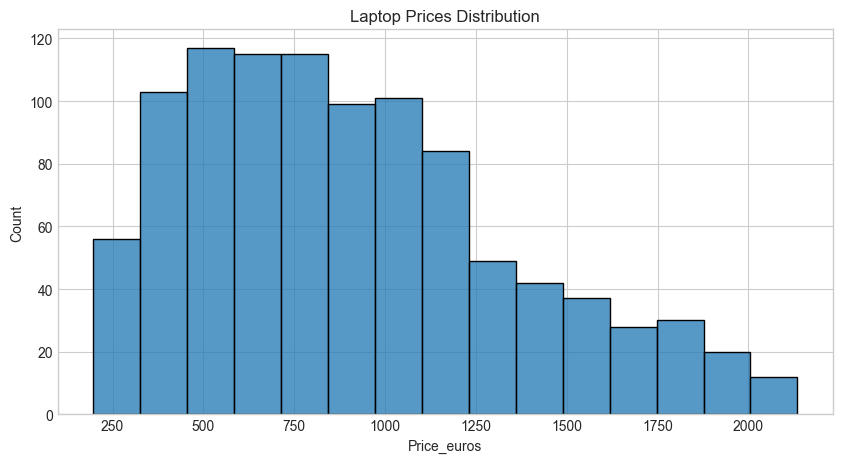

In [ ]:
# Histogram of Laptop Prices Distribution
laptop_prices = df['Price_euros']

plt.figure(figsize=(10, 5))
sns.histplot(data=laptop_prices, bins=15, kde=False, legend=True)
plt.title('Laptop Prices Distribution')
plt.show()

In [ ]:
# Sorted Laptop Prices
sorted_prices = df.sort_values('Price_euros')

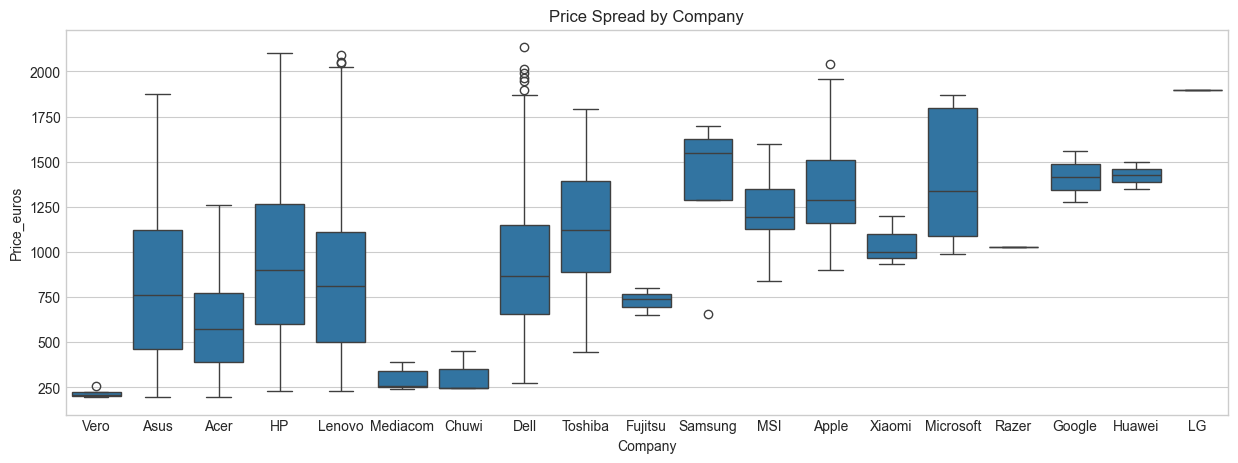

In [ ]:
# Boxplot of Price Spread Vs Company

plt.figure(figsize=(15, 5))
sns.boxplot(x='Company', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Company')
plt.show()

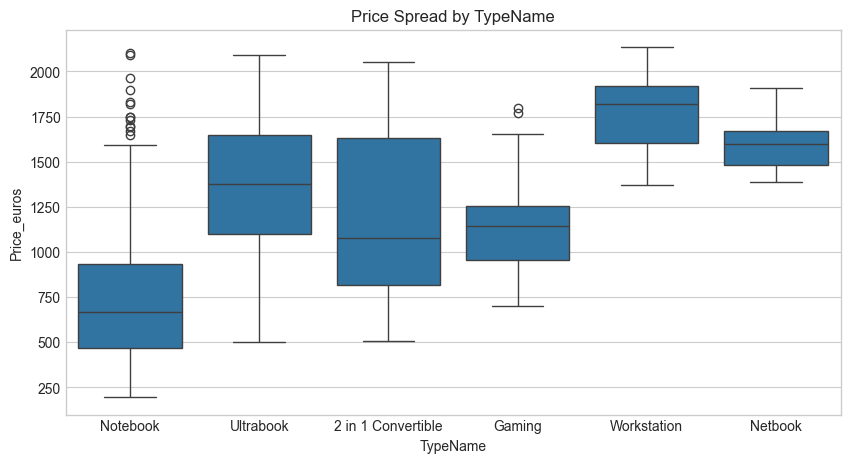

In [ ]:
# Boxplot of Price Spread Vs TypeName
plt.figure(figsize=(10, 5))
sns.boxplot(x='TypeName', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by TypeName')
plt.show()

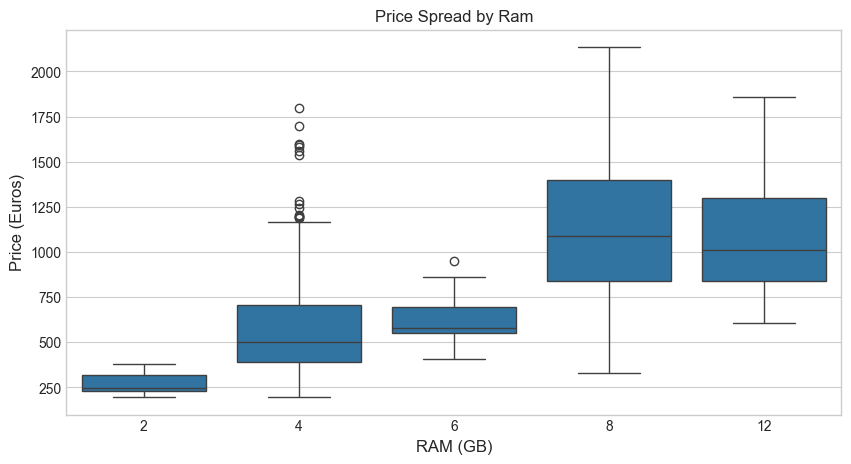

In [ ]:
# Boxplot of Price Vs Ram
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ram', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Ram')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

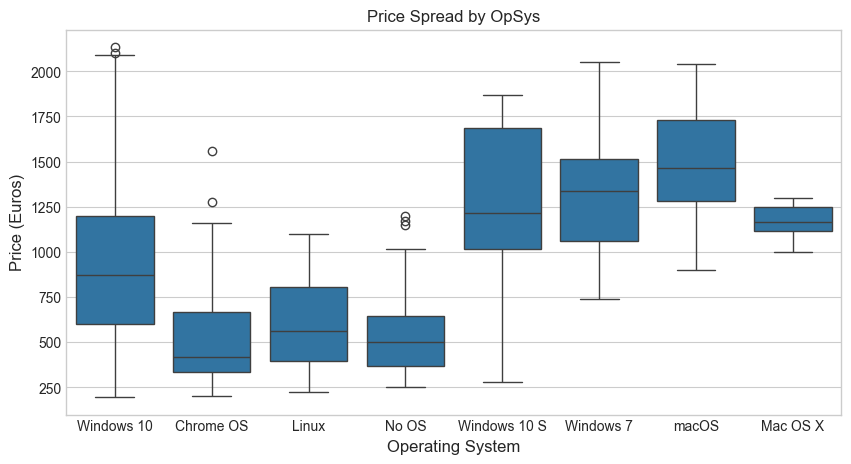

In [ ]:
# Boxplot of Price Vs Operating System
plt.figure(figsize=(10, 5))
sns.boxplot(x='OpSys', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by OpSys')
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

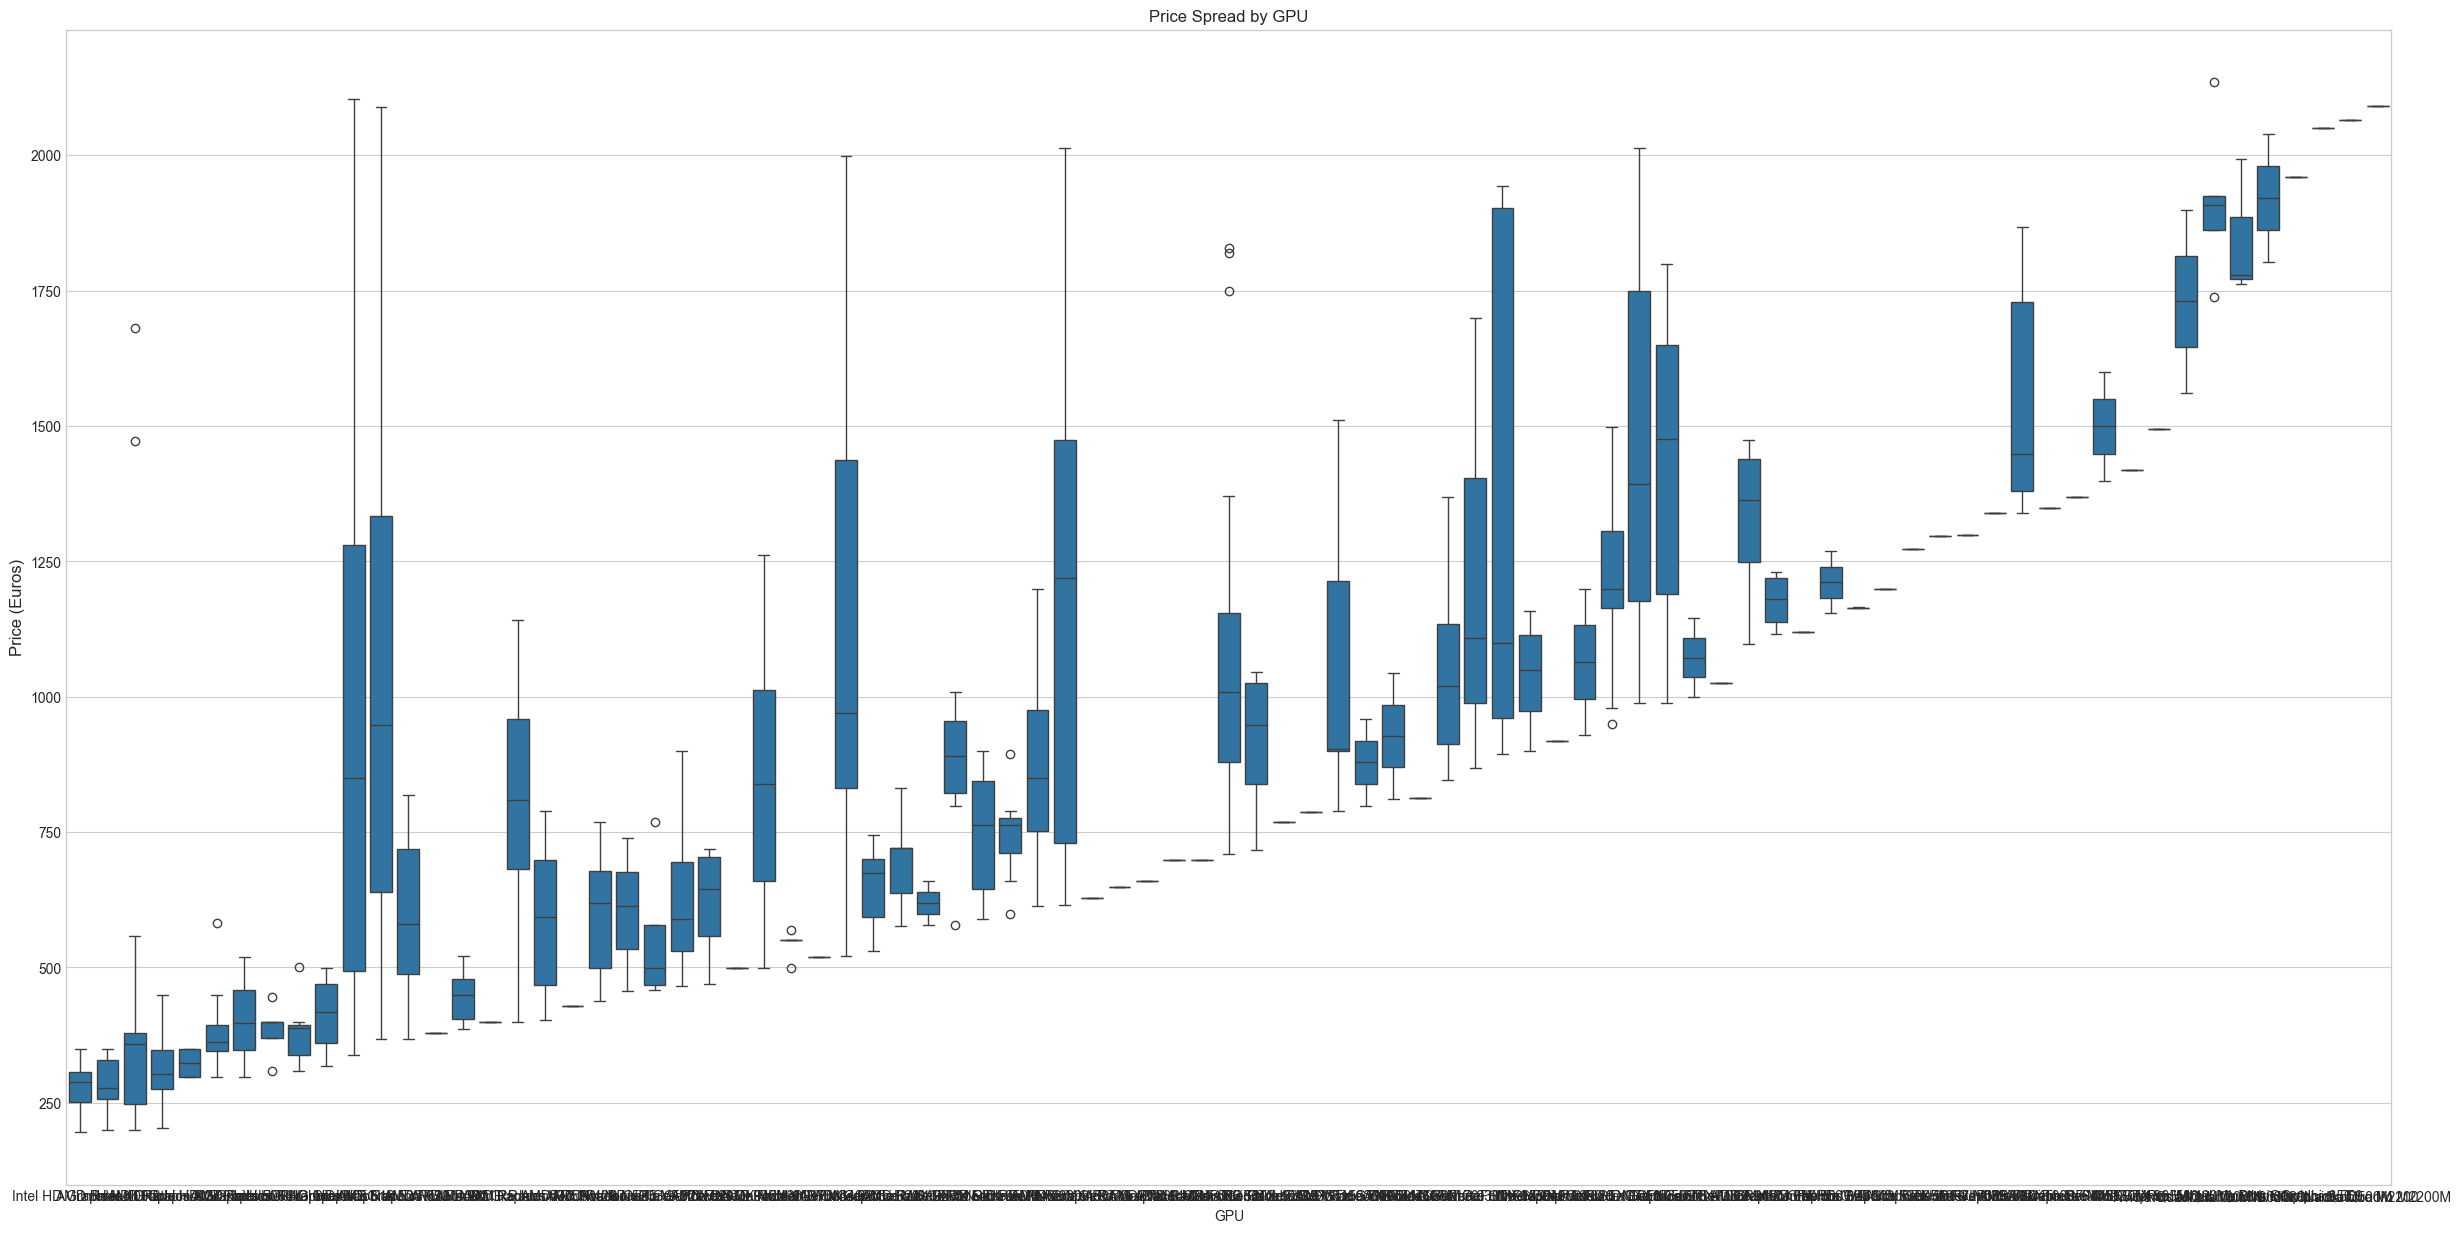

In [ ]:
# Boxplot of Price Vs GPU
plt.figure(figsize=(30, 15))
sns.boxplot(x='Gpu', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by GPU')
plt.xlabel('GPU')
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

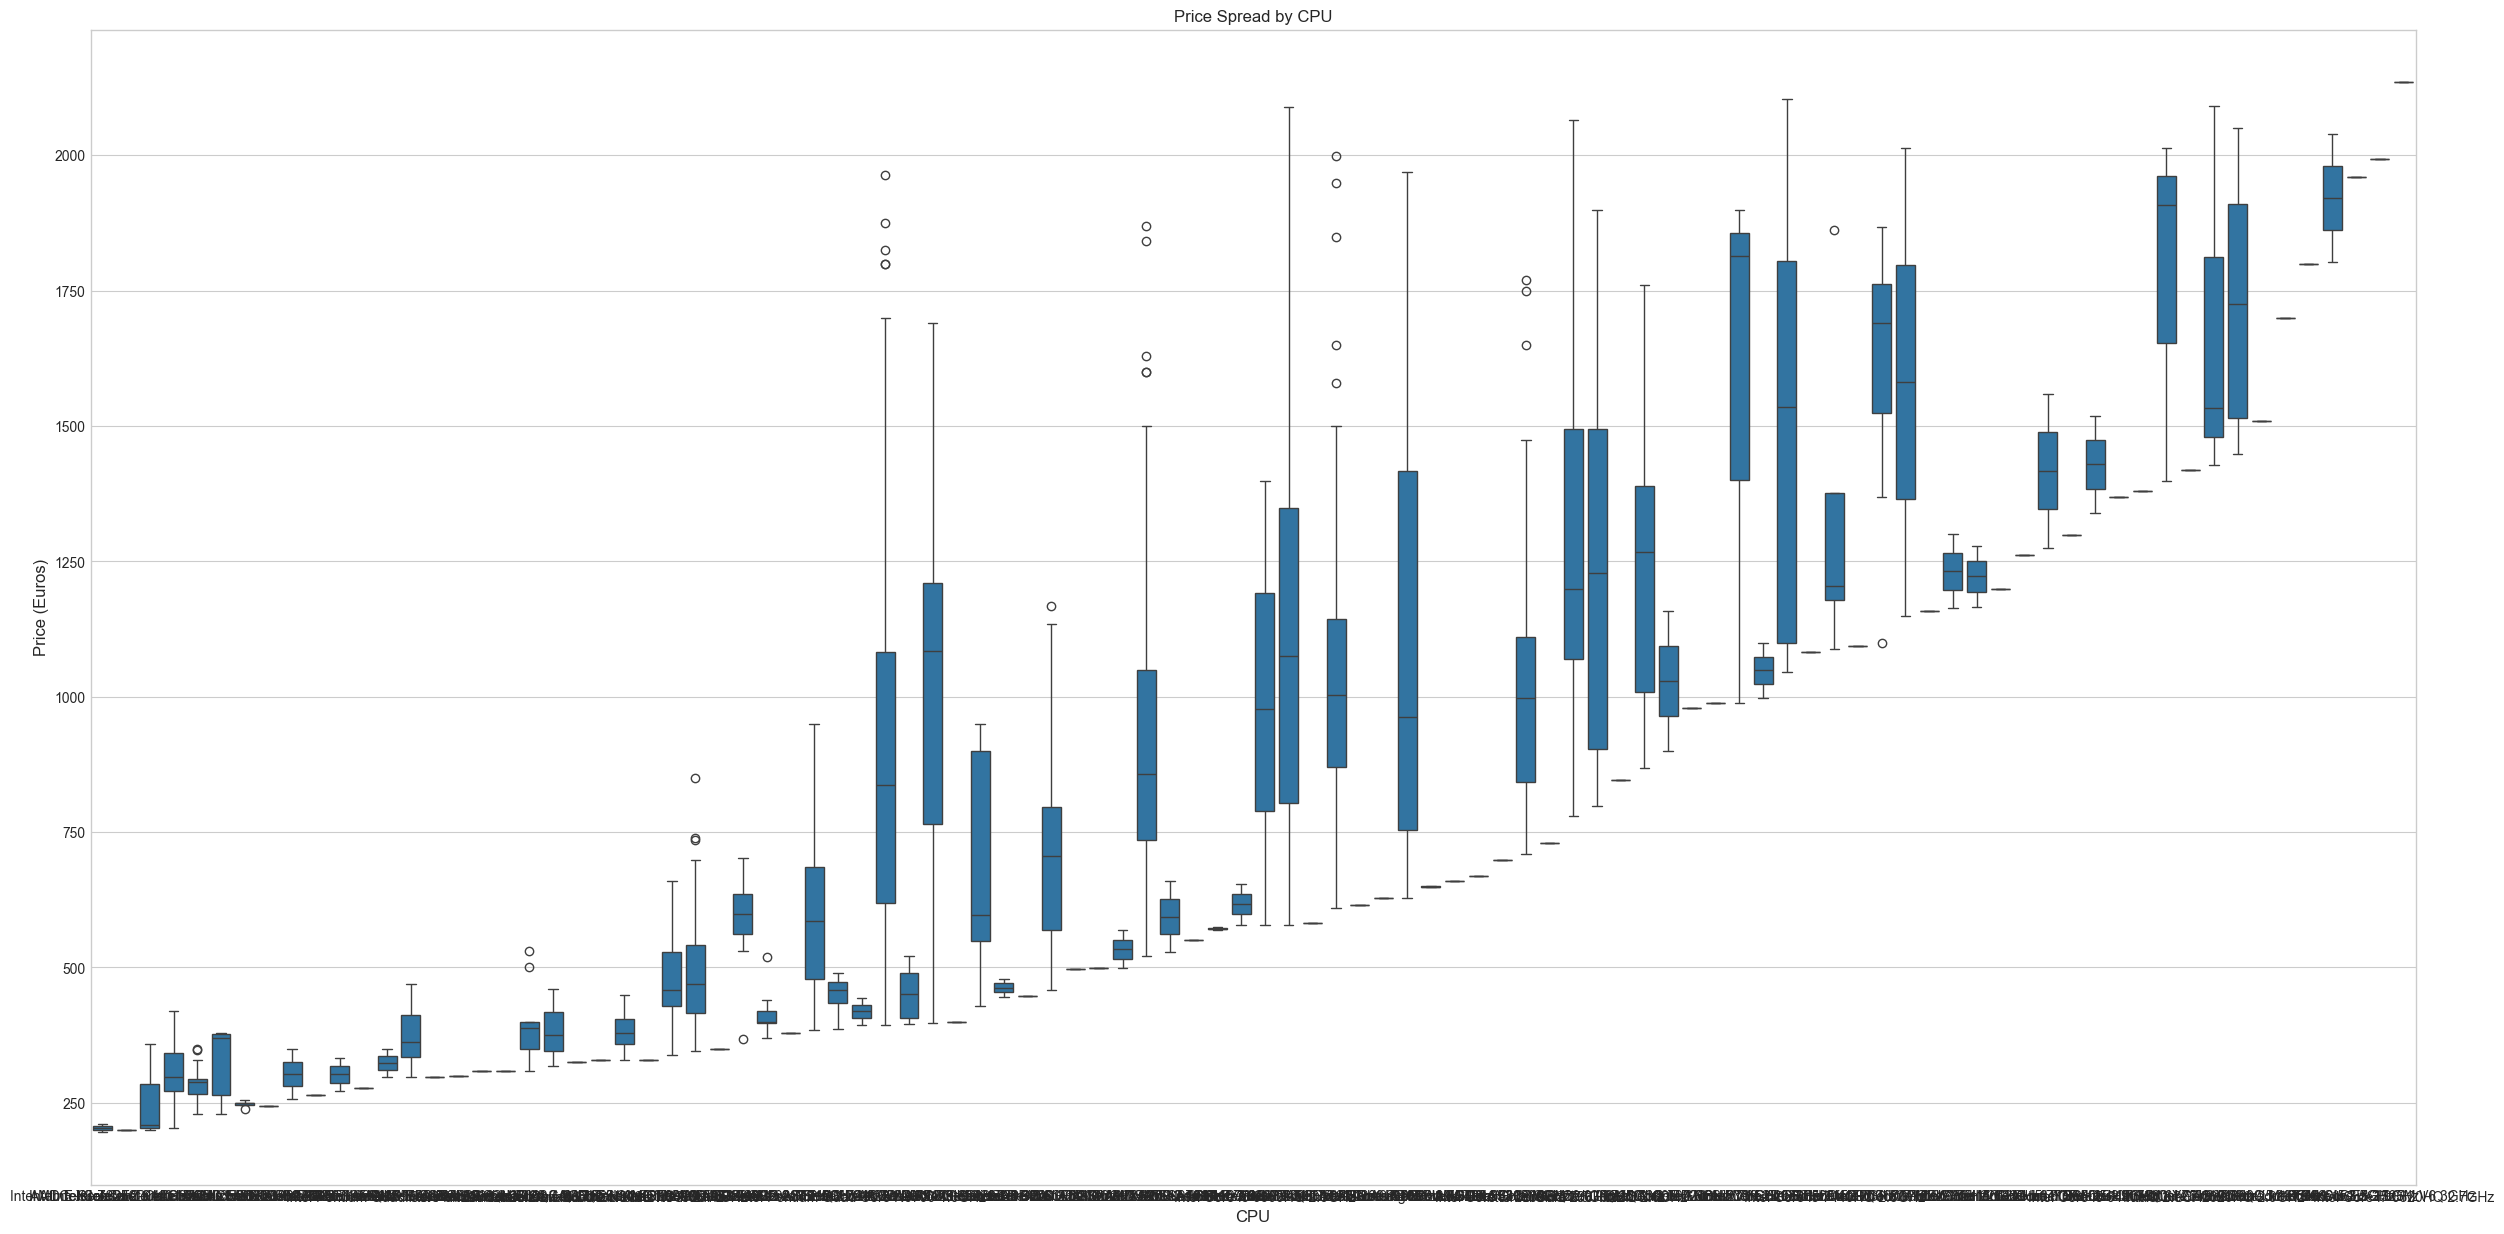

In [ ]:
# Boxplot of Price Vs CPU
plt.figure(figsize=(30, 15))
sns.boxplot(x='Cpu', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by CPU')
plt.xlabel('CPU', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

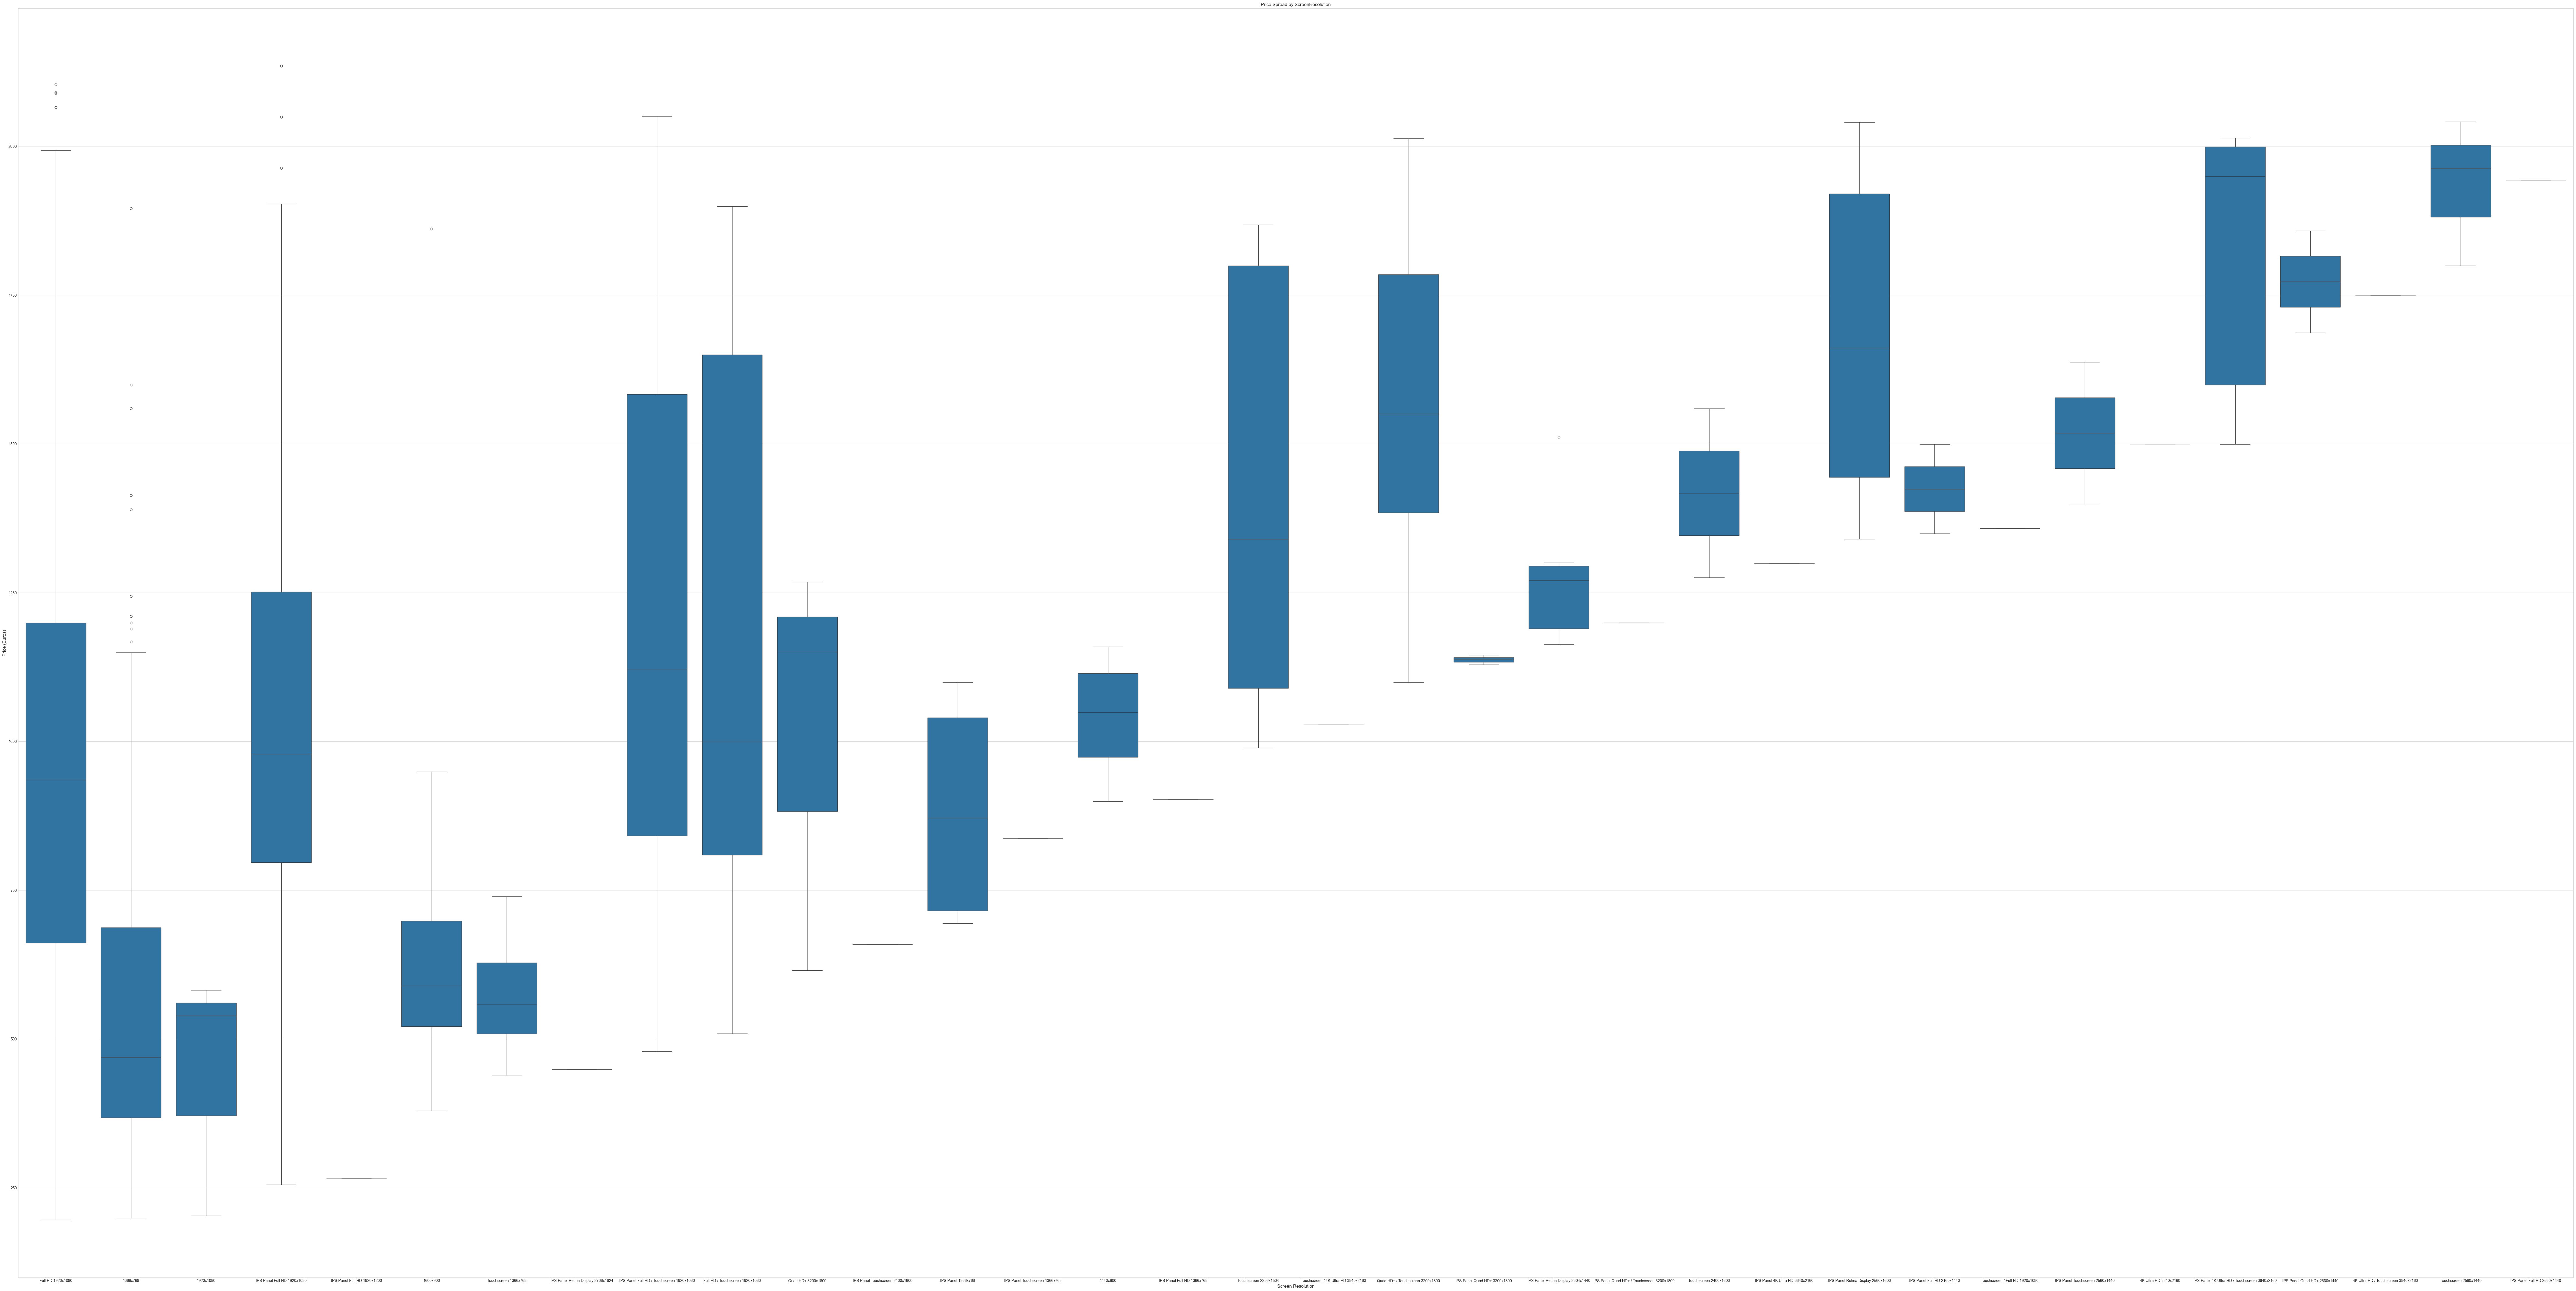

In [ ]:
# Boxplot of Price Vs Screen resolution
plt.figure(figsize=(120, 60))
sns.boxplot(x='ScreenResolution', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by ScreenResolution')
plt.xlabel('Screen Resolution', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

2. Generate relevant visualizations (e.g., histograms, scatter plots, box plots, and correlation heatmaps) to illustrate key insights.

Price vs Numerical features

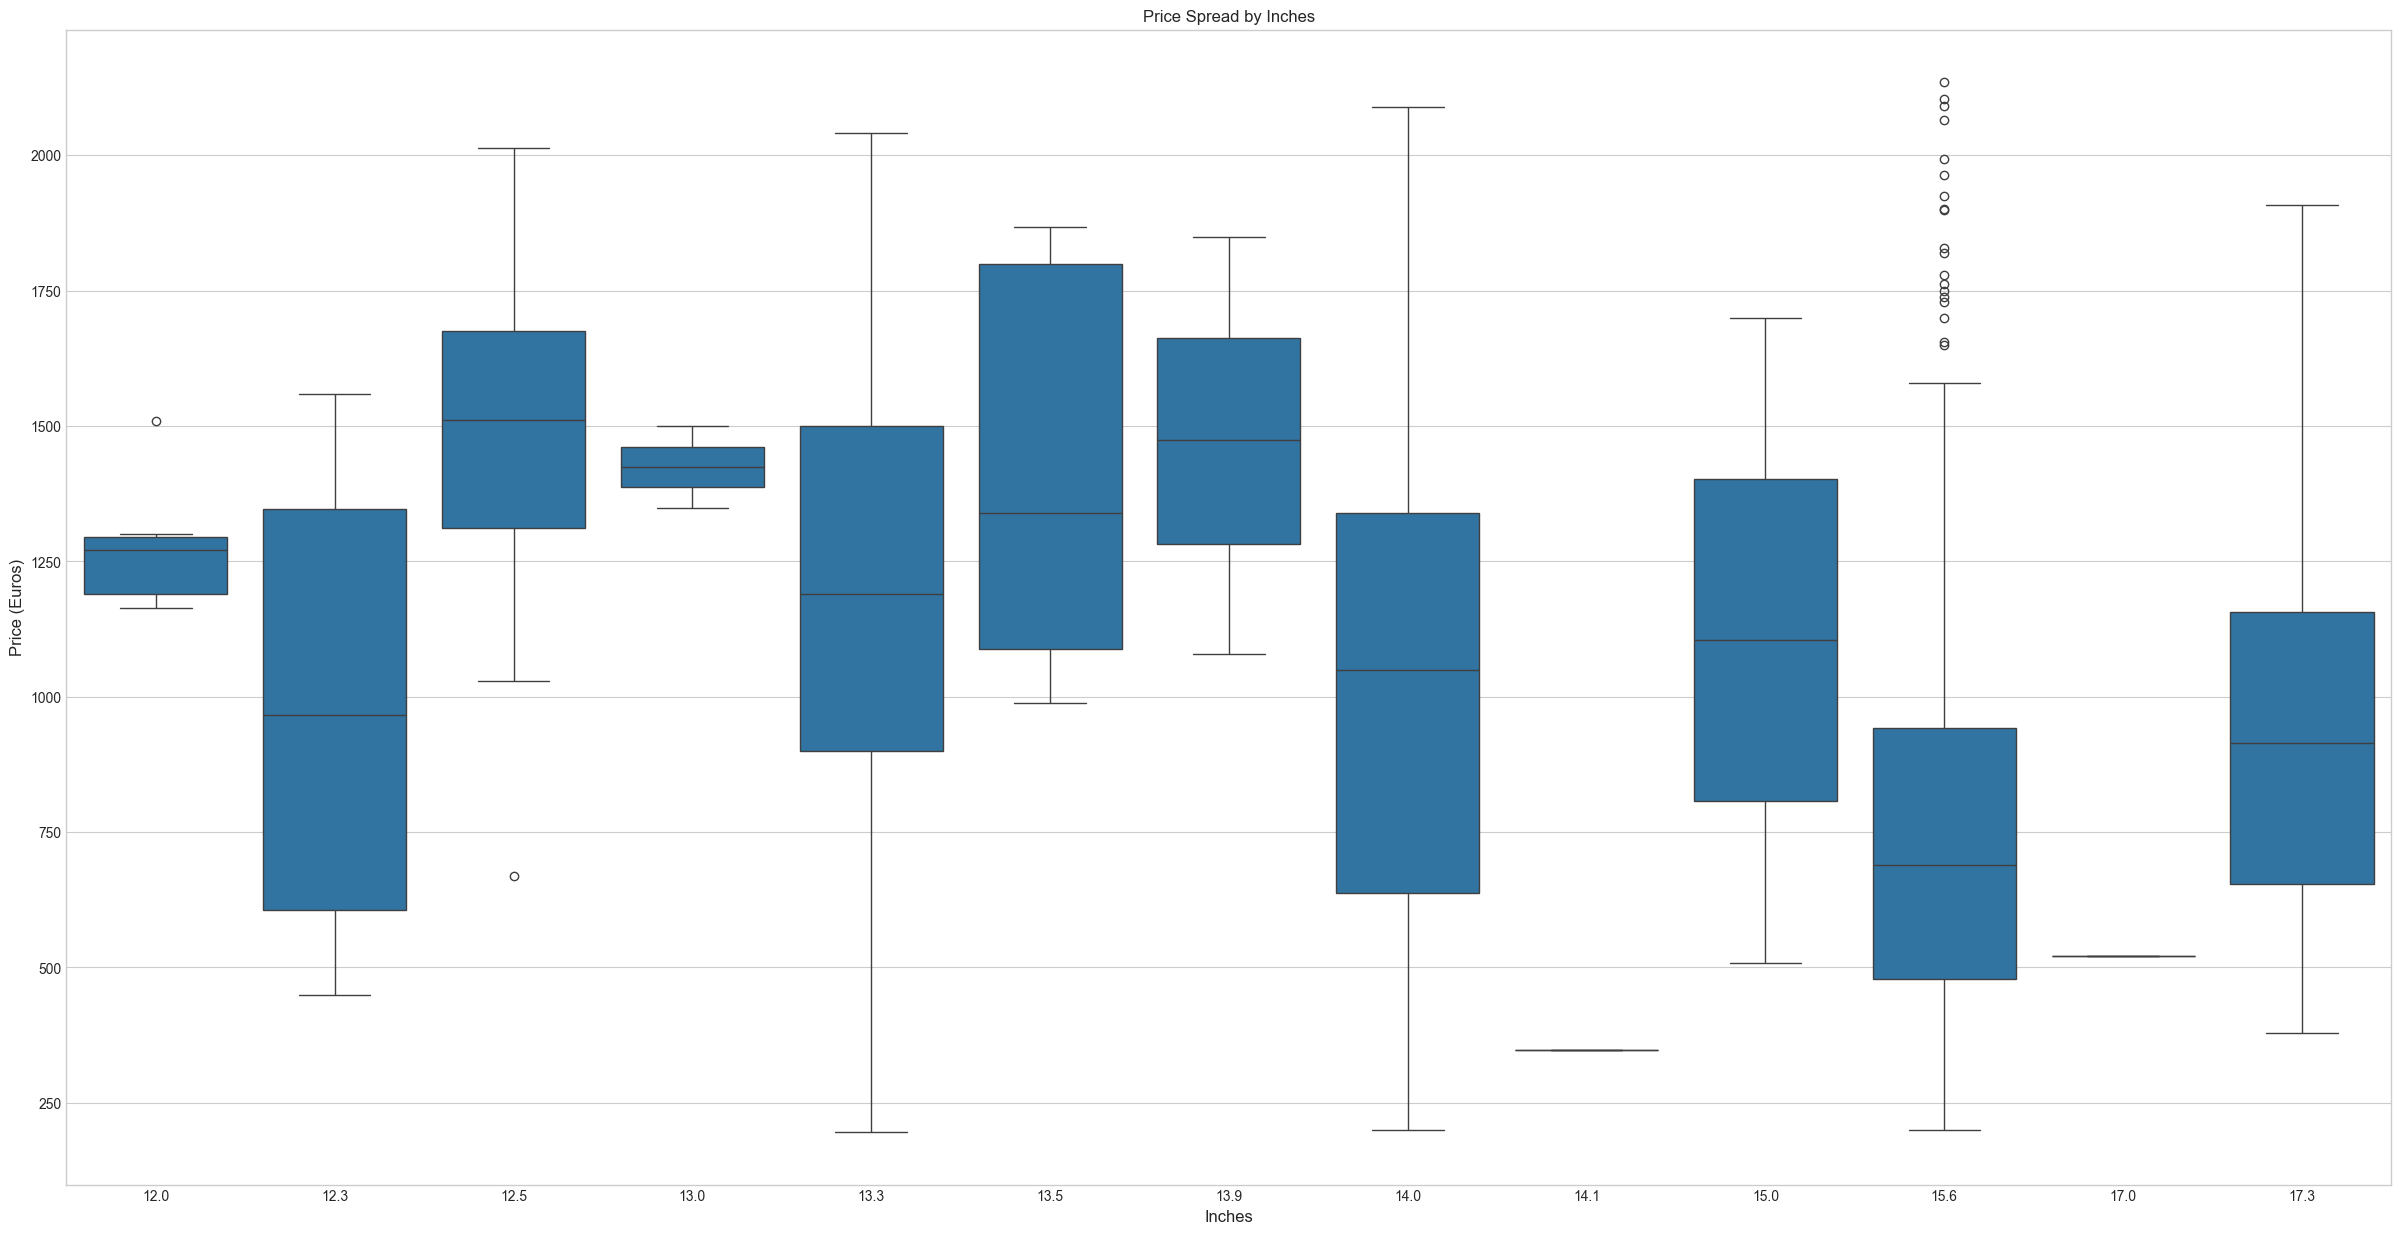

In [ ]:
# Boxplot of Price vs Inches
plt.figure(figsize=(30, 15))
sns.boxplot(x='Inches', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Inches')
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

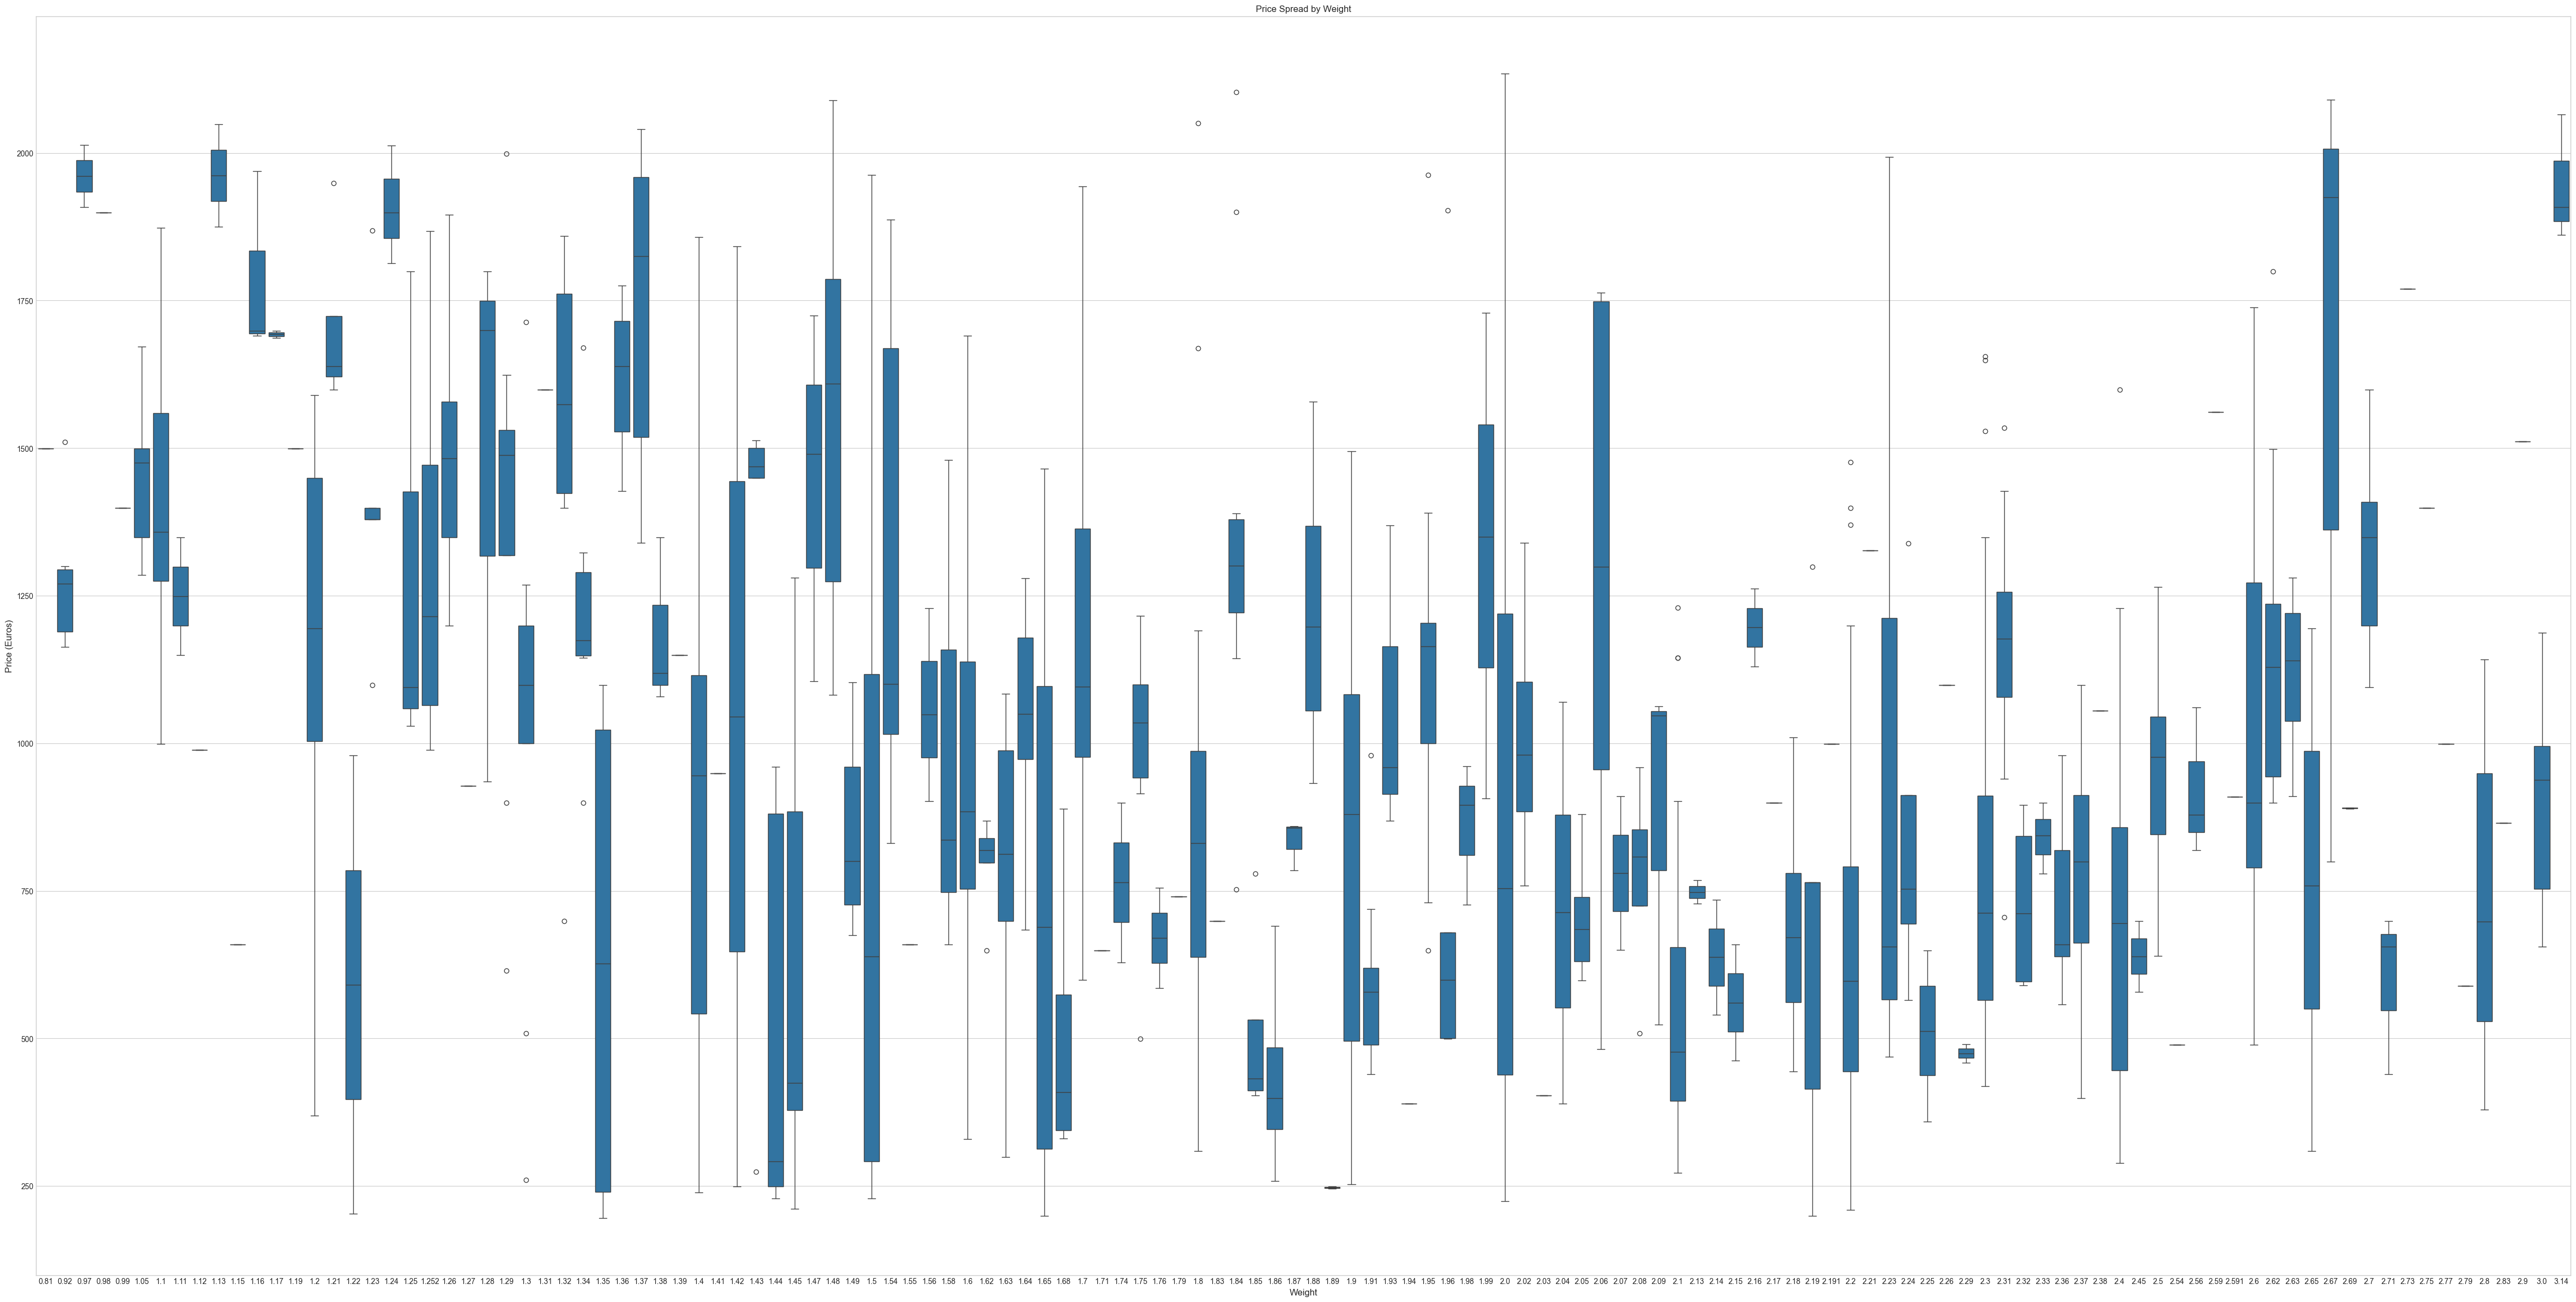

In [ ]:
# Boxplot of Price vs Weight
plt.figure(figsize=(60, 30))
sns.boxplot(x='Weight', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Weight')
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

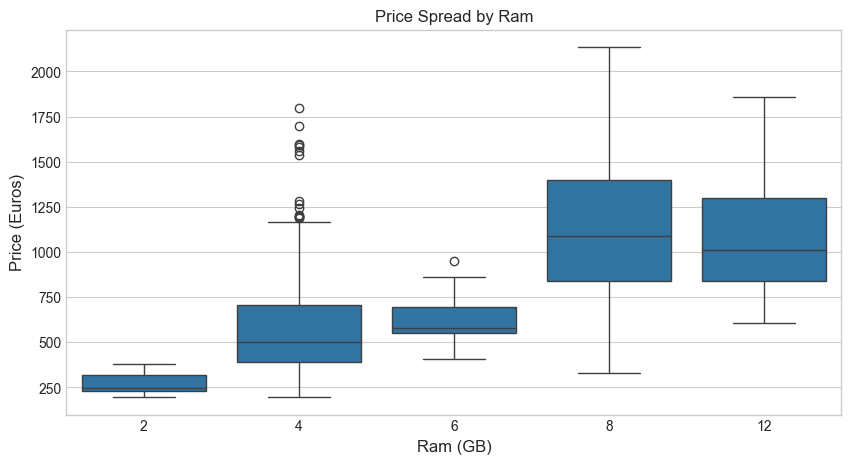

In [ ]:
# Boxplot of Price vs Ram
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ram', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Ram')
plt.xlabel('Ram (GB)', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

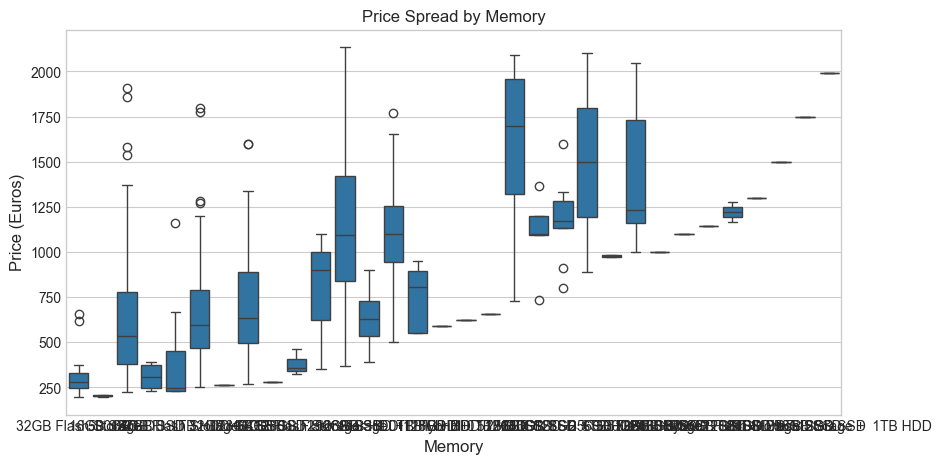

In [ ]:
# Price vs Memory
plt.figure(figsize=(10, 5))
sns.boxplot(x='Memory', y='Price_euros', data=sorted_prices)
plt.title('Price Spread by Memory')
plt.xlabel('Memory', fontsize=12)
plt.ylabel('Price (Euros)', fontsize=12)
plt.show()

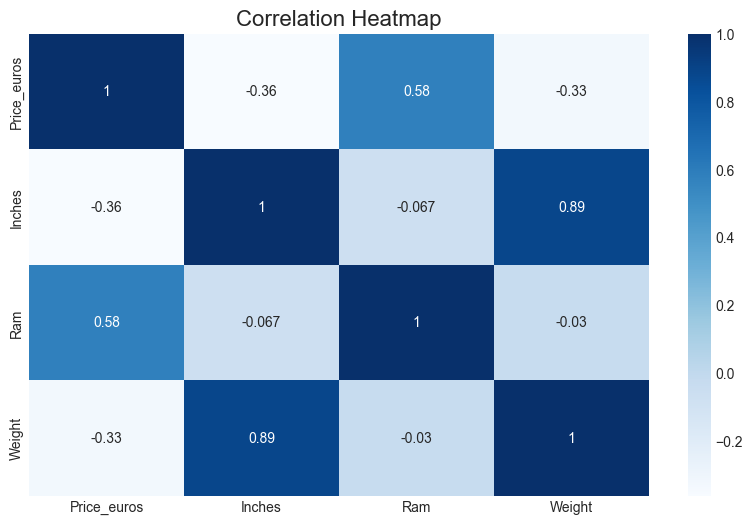

In [ ]:
# Correlation heatmap
corr_matrix = df[['Price_euros', 'Inches', 'Ram', 'Weight']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

3. Identify and discuss the most influential factors affecting car prices based on your analysis.

Based on the EDA and the correlation heatmap, the most influential factors affecting laptop prices are:

1. **RAM**: This is the single most influential factor with the strongest positive correlation (r=0.74). Laptops with more RAM are consistently priced higher.

2. **Screen Resolution**: Both Resolution_Width (r=0.55) and Resolution_Height (r=0.55) show a strong positive correlation with price. Higher resolution screens, especially those with features like IPS panels and touchscreens, are key price drivers.

3. **GPU**: Laptops with Nvidia GPUs have a higher median price range compared to other brands. This is likely due to their use in high-end gaming and professional workstations.

4. **Weight and Memory**: There is a moderate positive correlation between price and Weight (r=0.21) and Total_Memory_Amount (r=0.24). While not as strong as RAM or resolution, these factors still play a significant role.

5. **Company**: The laptop brand itself is a major factor. Brands like Razer, LG, and Microsoft produce laptops that are generally priced higher than others.

## Feature Engineering

1. Create new and meaningful features from the existing dataset where possible.

In [ ]:

# FEATURE ENGINEERING

import re # For regular expression
import numpy as np

# Make a copy of the dataset to avoid modifying original accidentally
df_fe = df.copy()

# Helper function: safe string extract
def safe_extract(pattern, text, default=np.nan):
    """Extract numerical values safely using regex."""
    if isinstance(text, str):
        match = re.search(pattern, text)
        return float(match.group(1)) if match else default
    return default

# Helper function: safe split
def safe_split(text, index=0, default="Unknown"):
    """Safely split text and return the requested index."""
    if isinstance(text, str):
        parts = text.split()
        return parts[index] if len(parts) > index else default
    return default

# 1. Extract Screen Width & Height from ScreenResolution
df_fe['Screen_Width'] = df_fe['ScreenResolution'].apply(lambda x: safe_extract(r'(\d+)x', x))
df_fe['Screen_Height'] = df_fe['ScreenResolution'].apply(lambda x: safe_extract(r'x(\d+)', x))

# 2. Extract CPU Brand (e.g., Intel, AMD, Samsung)
df_fe['Cpu_Brand'] = df_fe['Cpu'].apply(lambda x: safe_split(x, 0, "Unknown"))

# 3. Extract GPU Brand (e.g., Nvidia, Intel, AMD)
df_fe['Gpu_Brand'] = df_fe['Gpu'].apply(lambda x: safe_split(x, 0, "Unknown"))

# 4. Extract CPU Frequency (GHz)
df_fe['Cpu_Frequency'] = df_fe['Cpu'].apply(
    lambda x: safe_extract(r'(\d+\.\d+)', x)
)

# 5. Extract Memory Amount (in GB)
df_fe['Memory_Amount'] = df_fe['Memory'].apply(lambda x: safe_extract(r'(\d+)', x))

# 6. Extract Memory Type (SSD, HDD, Hybrid, Flash, Other)
def detect_memory_type(memory):
    if isinstance(memory, str):
        if "SSD" in memory:
            return "SSD"
        elif "HDD" in memory:
            return "HDD"
        elif "Hybrid" in memory:
            return "Hybrid"
        elif "Flash" in memory:
            return "Flash"
    return "Other"

df_fe['Memory_Type'] = df_fe['Memory'].apply(detect_memory_type)

# Preview the first few rows
df_fe.head()

2.  Justify the creation of any new features and explain how they might improve model performance.

### Why These Features Are Important

We selected these features because they are highly relevant to predicting laptop prices:

1. **Screen Width & Screen Height** - Larger screens usually increase laptop prices.
2. **Cpu_Brand & Gpu_Brand** - Different brands perform differently and affect pricing.
3. **Cpu_Frequency** - Higher clock speeds often indicate faster and more expensive laptops.
4. **Memory_Amount & Memory_Type** - The size and type of storage significantly influence laptop costs.

These features provide the model with additional, meaningful information and are expected to improve prediction accuracy.

## Model Building

1.  Split your data into training and testing sets.

2. Build a linear regression model for laptop price prediction

3. Train the regression model on the training data.


## Model Evaluation

1. Evaluate the performance of your trained models on the test set using appropriate regression metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).

## Save Model and Preprocessing Objects